# Capstone Project - Auto Ticket Assignment to the right IT Functional Groups

# Text Classification with Machine Learning

## Agenda

1. Model building in scikit-learn (refresher)
2. Representing text as numerical data
3. Reading a text-based dataset into pandas
4. Vectorizing our dataset
5. Building and evaluating a model
6. Comparing models
7. Examining a model for further insight
8. Tuning the vectorizer

## 1: Model building in scikit-learn

In [171]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# SVM
from sklearn import svm

# Feature Engineering:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Clustering:
from sklearn.cluster import KMeans

# metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Label Encoding:
from sklearn.preprocessing import LabelEncoder

# Grid Search:
import multiprocessing 

# Imputer:
from sklearn.preprocessing import Imputer

# Zscores and Scaler:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


# Decision Trees DT
#import graphviz
#from IPython.display import Image  

# PCA:
from sklearn.decomposition import PCA

# OS:
from os import system

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import tensorflow as tf
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer


import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
# import these modules 
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer


from sklearn.metrics import cohen_kappa_score
#from xgboost import XGBClassifier
#from xgboost import plot_importance

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [173]:
# Load datasets from various excel files
df1 = pd.read_excel("incident-Jul 2016-Oct2016.xlsx")
df2 = pd.read_excel("incident-Nov 2016-Feb2017.xlsx")
df3 = pd.read_excel("incident-Mar 2017-Jun2017.xlsx")
df4 = pd.read_excel("incident-Jul 2017-Oct2017.xlsx")
df5 = pd.read_excel("incident-Nov 2017-Feb2018.xlsx")
df6 = pd.read_excel("incident-Mar 2018-Jun2018.xlsx")
df7 = pd.read_excel("incident-Jul 2018-Oct2018.xlsx")

In [174]:
# Load Test data set separately
df_val = pd.read_excel("incident-Nov 2018-Feb2019-Test.xlsx")

In [ ]:
# Load Test data set separately
df_map = pd.read_excel("GROUP MAPPING.xlsx")

In [ ]:
df_map.head()

In [175]:
# Look at the shape / number of records in each file
print("df1 shape -", df1.shape)
print("df2 shape -", df2.shape)
print("df3 shape -", df3.shape)
print("df4 shape -", df4.shape)
print("df5 shape -", df5.shape)
print("df6 shape -", df6.shape)
print("df7 shape -", df7.shape)
print("Validation Data shape -", df_val.shape)

df1 shape - (25420, 12)
df2 shape - (24240, 12)
df3 shape - (25230, 12)
df4 shape - (23479, 12)
df5 shape - (24306, 12)
df6 shape - (25238, 12)
df7 shape - (26986, 12)
Validation Data shape - (25661, 12)


In [176]:
# Get the overall size of the dataset / number of records
test = (df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0] + df6.shape[0] + df7.shape[0])
test

174899

In [177]:
df_val.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count'],
      dtype='object')

In [178]:
# concatenate all the files into one dataframe
frames = [df1, df2, df3, df4, df5, df6, df7]
sn_df = pd.concat(frames)
sn_df.head(2)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager name)\n-Checked the user name in AD and reset the pa...,2016-10-31 23:40:58,0
1,INC0454813,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Kim Walker,GSO - Service Desk,2016-10-31 22:42:56,Tarun Vakharia,Kim Walker,INBG,OUTLOOK,"\n\nreceived from: kim.walker@kennametal.com\n\nHello team,\n\nMy meetings/skype meetings etc ar...",2016-10-31 23:59:10,0


In [179]:
df_val.head(2)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
0,INC0759016,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Nishant Mahere,GSO - Service Desk,2019-02-28 22:55:57,Swastik Goswami,Nishant Mahere,IFBG,Regarding SAP Login,"\n\nreceived from: Nishant.Mahere@kennametal.com\n\nHi,\n\nI am facing issue with SAP login. Req...",2019-02-28 23:36:22,0
1,INC0759012,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Shawn Blevins,GSO - Service Desk,2019-02-28 22:51:57,Swastik Goswami,Shawn Blevins,HRES,Potential Phish: [External] Snelling - Best of Staffing® 2019 Client Satisfaction Award!,\n\nreceived from: shawn.blevins@kennametal.com\n\n,2019-02-28 23:46:20,0


In [180]:
sn_df.shape

(174899, 12)

In [ ]:
mydict = dict(zip(df_map['AG'],df_map['New AG']))
sn_df['Assignment group new'] = sn_df['Assignment group'].map(mydict)

In [ ]:
mydict

In [ ]:
mydict1 = dict(zip(df_map['AG'],df_map['New AG']))
df_val['Assignment group new'] = df_val['Assignment group'].map(mydict1)

In [181]:
sn_df.head(1)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager name)\n-Checked the user name in AD and reset the pa...,2016-10-31 23:40:58,0


In [182]:
df_val.tail(1)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
25660,GREQ0311049,4–Single User Issue-Not Urgent <=45 Days Resolution,Silke Stoeckert,Solutioning,2015-07-21 07:28:42,Susanne Noster,Silke Stoeckert,FINA,Commission invoices via SAP SD / Provisionsabrechnungen über SAP-SD,Commission invoices are currently partly manually handled partly via SD . The documents that are...,2019-01-21 09:40:22,0


#### Data PREPROCESS 

In [ ]:
AG= pd.value_counts(sn_df['Assignment group new'].values, sort=True)
pd.DataFrame(AG).to_csv('Distict_group.csv')

In [ ]:
AG.plot(kind='bar',figsize = (15,8))

In [183]:
# Create a Type column with first 3 letters from Number - Incident - INC or Generic Request - GRE
sn_df["Type"] = sn_df["Number"].str[0:3]
df_val["Type"] = df_val["Number"].str[0:3]
sn_df["Severity"] = sn_df["Priority"].str[0:4]
df_val["Severity"] = df_val["Priority"].str[0:4]
sn_df.head(2)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count,Type,Severity
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager name)\n-Checked the user name in AD and reset the pa...,2016-10-31 23:40:58,0,INC,Sev4
1,INC0454813,Sev4–Single User Issue-Not Urgent <=20 Days Resolution,Kim Walker,GSO - Service Desk,2016-10-31 22:42:56,Tarun Vakharia,Kim Walker,INBG,OUTLOOK,"\n\nreceived from: kim.walker@kennametal.com\n\nHello team,\n\nMy meetings/skype meetings etc ar...",2016-10-31 23:59:10,0,INC,Sev4


In [184]:
sn_df.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count', 'Type', 'Severity'],
      dtype='object')

In [185]:
ty_sev = sn_df[(sn_df["Type"] == "INC") & (sn_df["Severity"] == "Sev1")]
ty_sev.shape
# Sev1 incidents

(460, 14)

In [186]:
# Incident dataframe
sn_inc = sn_df[(sn_df["Type"] == "INC")]

In [187]:
sn_inc["Severity"].value_counts()

Sev4    95071
Sev3     2412
Sev2     1780
Sev1      460
4–Si      329
5 -        60
4U–S       22
3–Me       17
2–Pr        7
Name: Severity, dtype: int64

In [188]:
print("Data Set -\n", sn_df["Type"].value_counts())
print("Validation Set - \n", df_val["Type"].value_counts())

Data Set -
 INC    100159
GRE     74740
Name: Type, dtype: int64
Validation Set - 
 INC    16721
GRE     8940
Name: Type, dtype: int64


In [189]:
sn_inc['Reassignment count'].value_counts()

0     70883
1     21842
2      5649
3      1155
4       374
5       149
6        59
7        20
8        13
9        11
10        3
11        1
Name: Reassignment count, dtype: int64

In [190]:
#pareto chart
chart1 = pd.DataFrame()

In [191]:
chart1['count']=sn_inc['Assignment group'].value_counts()
#sn_df['Assignment group'].value_counts()#sn_df.groupby(['Assignment group', 'group', 'term']).size().unstack(fill_value=0)

In [192]:
chart1 = chart1.sort_values(by='count',ascending=False)

In [193]:
chart1["cumpercentage"] = chart1["count"].cumsum()/chart1["count"].sum()*100

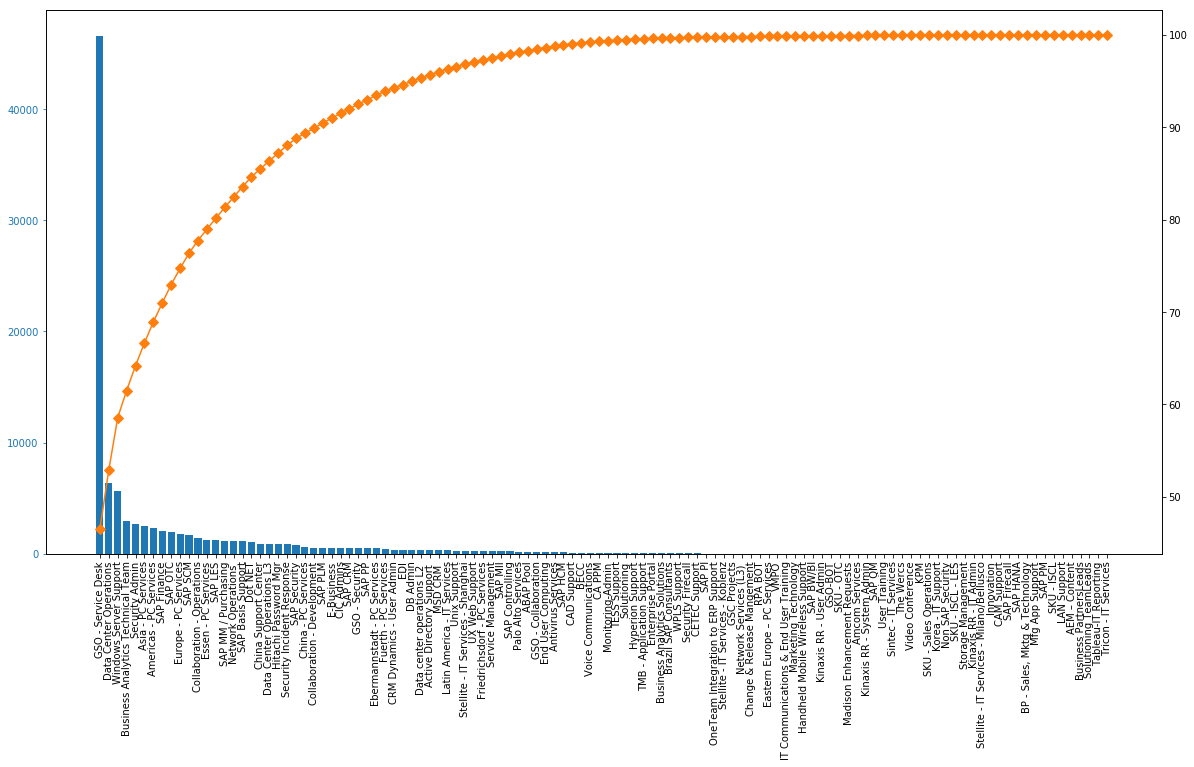

In [194]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(chart1.index, chart1["count"], color="C0")
plt.xticks(rotation='vertical')
ax2 = ax.twinx()
ax2.plot(chart1.index, chart1["cumpercentage"], color="C1", marker="D", ms=7)
ax.tick_params(axis="y", colors="C0")
plt.xticks(rotation='vertical')
#ax2.tick_params(axis="y", colors="C1")
plt.show()

#### Problem Statement:
Data center operations L2	570
Data Center Operations	12398
GSC Projects	28
GSO - Collaboration	234
GSO - Security	2111
GSO - Service Desk	54053
Total L1 and L2 Tickets 	69394
Overall Tickets 	174899
L1 / L2 Ticket Closure = 40%
Per year calculations: Assuming 15 min of effort for each SOP and 30% of L1/L2 tickets go through SOPs
@30% of 69394 = 20818
@ 15 min per SOP = 5205 hours for 2.4 years, 2169 hours per year
Which is equivalent to 1 FTE
Sev 1 Incidents = 460 / 100159 = 0.5%
Total Re-assigned Tickets (post assigning to one of the Functional teams) = 174899 - 115142 - 45037 = 14720
Total tickets assigned by L1 / L2 to other functional teams = 174899 - 69394 = 105505
Assuming 25-30% of 105505 are assigned directly to the functional teams by Users / Monitoring Tools = 31652
% Tickets getting re-assigned post L1 / L2 assigned to functional teams = 14720 / (105505 - 31652) = 20%

### Identifying Nan values and taking care it

In [ ]:
print("Data Set Length with Null Values in Description Column Main DF :",sn_inc['Description'].isnull().sum())
print("Data Set Length with Null Values in Description Column Validation :",df_val['Description'].isnull().sum())

In [ ]:
print("Data Set Length with Null Values in short Description Column :",sn_inc['Short description'].isnull().sum())
print("Data Set Length with Null Values in short Description Column Validation :",df_val['Short description'].isnull().sum())

In [ ]:
print ("Original sn_inc:", sn_inc.shape)
print ("validation df_val:", df_val.shape)

In [ ]:
sn_inc_new = sn_inc.dropna(axis=0, subset=['Description','Short description'])
print ("New sn_inc:", sn_inc_new.shape)

In [ ]:
df_val_new = df_val.dropna(axis=0, subset=['Description','Short description'])
print ("New df_val:", df_val_new.shape)

In [ ]:
sn_inc_new['Description'].to_csv ('all_description.csv')

In [ ]:
sn_inc_new['Short description'].to_csv ('all_shortdescription.csv')

In [ ]:
df_val_new['Description'].to_csv ('all_description_val.csv')

In [ ]:
sn_inc_new['Description'].head(10)

In [195]:
# Identify null values from Description
nan_rows = sn_inc[sn_inc['Description'].isnull()]
print("Data Set Length with Null Values in Description Column -",len(nan_rows))
nan_rows = df_val[df_val['Description'].isnull()]
print("Test Data Set Length with Null Values in Description Column -",len(nan_rows))

Data Set Length with Null Values in Description Column - 649
Test Data Set Length with Null Values in Description Column - 54


In [196]:
# Replace Nan values in Description to THE - since this stop word will be eliminated in the vectorization
sn_inc["Description"].fillna("The", inplace=True)
df_val["Description"].fillna("The", inplace=True)

In [197]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['Short description'].isnull()]
print("Data Set Length with Null Values in Short Description Column -",len(nan_rows))
nan_rows = df_val[df_val['Short description'].isnull()]
print("Test Data Set Length with Null Values in Short Description Column -",len(nan_rows))

Data Set Length with Null Values in Short Description Column - 2
Test Data Set Length with Null Values in Short Description Column - 0


In [198]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["Short description"].fillna("The", inplace=True)
df_val["Short description"].fillna("The", inplace=True)

In [199]:
sn_inc1=sn_inc.copy()

In [200]:
df_val1=df_val.copy()

#### Convert in Lower case

In [201]:
#sn_inc1=sn_inc_new

In [202]:
#df_val1=df_val_new

In [203]:
sn_inc1['Description'] = sn_inc1['Description'].apply(lambda x: x.lower())
sn_inc1['Short description'] = sn_inc1['Short description'].apply(lambda x: x.lower())

In [204]:
df_val1['Description'] = df_val1['Description'].apply(lambda x: x.lower())
df_val1['Short description'] = df_val1['Short description'].apply(lambda x: x.lower())

In [205]:
sn_inc1['Description'].head(10)

0    -verified user details.(employee# & manager name)\n-checked the user name in ad and reset the pa...
1    \n\nreceived from: kim.walker@kennametal.com\n\nhello team,\n\nmy meetings/skype meetings etc ar...
2    \n\nreceived from: jaques.vanderberg@kennametal.com\n\nhi\n\ni cannot log on to vpn\n\nbest rega...
3                                                                              unable to access adp page
4                                                                           unable to log in to euremote
5                                                                                           skype error 
6                                                            unable to log in to tool reporter and skype
7    event: critical:axhq30450.kmtl.com the value of mountpoint threshold for /oracle/p21/sapdata21/s...
8                                  greq0449280- employment status - new non-employee [enter user's name]
9                                                      

In [206]:
df_val1['Short description'].head(3)

0                                                                          regarding sap login
1    potential phish: [external] snelling - best of staffing® 2019 client satisfaction award! 
2                potential phish: [external] your account has been hacked! you need to unlock.
Name: Short description, dtype: object

#### Remove punctuations

In [207]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
def remove_punct(text):
    text = re.sub('[0-9]+|\n|\r|[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)
    return text

In [209]:
import re
sn_inc1['Description_new'] = sn_inc1['Description'].apply(lambda x: remove_punct(x))
sn_inc1['Short description'] = sn_inc1['Short description'].apply(lambda x: remove_punct(x))


In [210]:
sn_inc1[['Description','Description_new']].head(10)

,Description,Description_new
0,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the pa...,verified user details employee manager name checked the user name in ad and reset the pas...
1,"\n\nreceived from: kim.walker@kennametal.com\n\nhello team,\n\nmy meetings/skype meetings etc ar...",received from kim walker kennametal com hello team my meetings skype meetings etc are not ...
2,\n\nreceived from: jaques.vanderberg@kennametal.com\n\nhi\n\ni cannot log on to vpn\n\nbest rega...,received from jaques vanderberg kennametal com hi i cannot log on to vpn best regards jaq...
3,unable to access adp page,unable to access adp page
4,unable to log in to euremote,unable to log in to euremote
5,skype error,skype error
6,unable to log in to tool reporter and skype,unable to log in to tool reporter and skype
7,event: critical:axhq30450.kmtl.com the value of mountpoint threshold for /oracle/p21/sapdata21/s...,event critical axhq kmtl com the value of mountpoint threshold for oracle p sapdata sr psa ...
8,greq0449280- employment status - new non-employee [enter user's name],greq employment status new non employee enter user s name
9,unable to disable add ins on outlook,unable to disable add ins on outlook


In [211]:
df_val1['Description'] = df_val1['Description'].apply(lambda x: remove_punct(x))
df_val1['Short description'] = df_val1['Short description'].apply(lambda x: remove_punct(x))

In [212]:
sn_inc1['Description'] = sn_inc1['Description'].apply(lambda x: remove_punct(x))

In [213]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [214]:
DD=sn_inc1['Description_new'].head(10)

In [215]:
DD

0     verified user details  employee    manager name   checked the user name in ad and reset the pas...
1      received from  kim walker kennametal com  hello team   my meetings skype meetings etc are not ...
2      received from  jaques vanderberg kennametal com  hi  i cannot log on to vpn  best regards  jaq...
3                                                                              unable to access adp page
4                                                                           unable to log in to euremote
5                                                                                           skype error 
6                                                            unable to log in to tool reporter and skype
7    event  critical axhq  kmtl com the value of mountpoint threshold for  oracle p  sapdata  sr psa ...
8                                        greq   employment status   new non employee  enter user s name 
9                                                      

In [216]:
#Creating a sets whith all distinct words for short description
from nltk.tokenize import word_tokenize
tokenized_word_DD=word_tokenize(str(DD))
#testing for 10 words so seprated


In [217]:
top10=tokenized_word_DD[:20]
top10

['0',
 'verified',
 'user',
 'details',
 'employee',
 'manager',
 'name',
 'checked',
 'the',
 'user',
 'name',
 'in',
 'ad',
 'and',
 'reset',
 'the',
 'pas',
 '...',
 '1',
 'received']

In [218]:
def searchRE(regex, value, s):
    #print(regex)
    s = re.sub(regex,value,s)
    return s

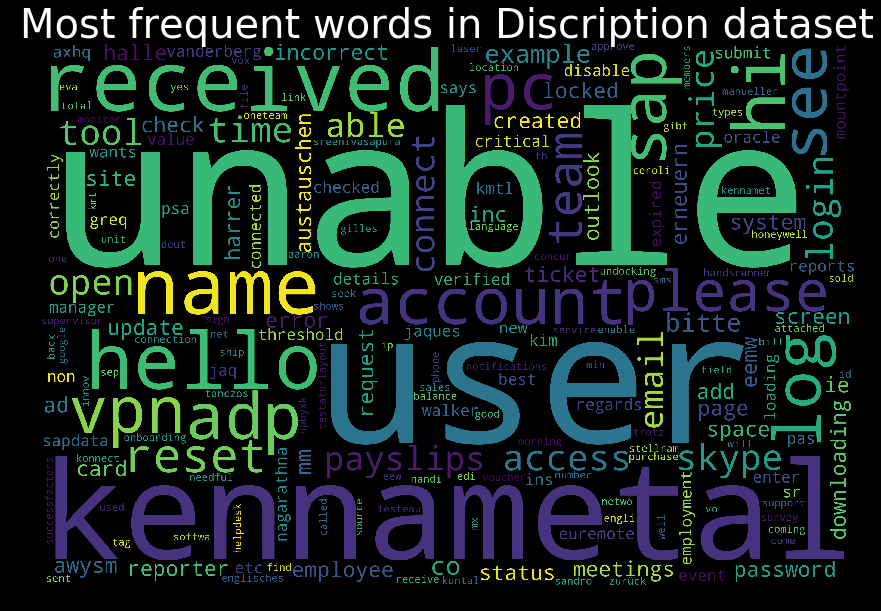

In [219]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_inc1['Description_new']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Discription dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

### Remove Accented Characters

In [220]:
!pip install unidecode

In [221]:
accented_string = 'Málaga'
import unidecode
uc = unidecode
unaccented_string = uc.unidecode(accented_string)
unaccented_string

'Malaga'

In [222]:
sn_inc=sn_inc1.copy()
df_val=df_val1.copy()

In [223]:
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: uc.unidecode(x))
sn_inc['Short description'] = sn_inc['Short description'].apply(lambda x: uc.unidecode(x))

In [224]:
df_val['Description'] = df_val['Description'].apply(lambda x: uc.unidecode(x))
df_val['Short description'] = df_val['Short description'].apply(lambda x: uc.unidecode(x))

In [225]:
pd.set_option('max_colwidth', 100)

In [226]:
sn_inc['Description'].head()

0     verified user details  employee    manager name   checked the user name in ad and reset the pas...
1      received from  kim walker kennametal com  hello team   my meetings skype meetings etc are not ...
2      received from  jaques vanderberg kennametal com  hi  i cannot log on to vpn  best regards  jaq...
3                                                                              unable to access adp page
4                                                                           unable to log in to euremote
Name: Description, dtype: object

### Remove Stop Words

In [227]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"weren't", "wasn't", 'that', 'an', "you'd", 'into', 'for', 'was', "needn't", 'were', 'herself', 'don', 'had', 'been', 'doesn', 'she', 'whom', 'ourselves', 'if', 'these', 'as', 's', 'ma', 'me', 'who', 'after', 'here', "shan't", "she's", 'up', 'both', 'have', 'most', 'its', 'hadn', 'weren', 'why', 'no', 'shouldn', 'just', 'at', 'wouldn', 'during', 'himself', 'such', "haven't", 'mightn', 'having', 'those', 'what', 'has', 'hasn', 'will', "didn't", "don't", 'once', 'on', 'then', 'there', 'when', 'my', 'through', 'won', "you've", 'only', 'it', 'same', 'than', 'am', 'your', 're', 'itself', 'can', 'them', "shouldn't", "won't", 'against', "it's", 'does', 'wasn', 'any', "aren't", 'under', 'yourself', 'o', 'how', 'but', 'd', 'doing', 'haven', "that'll", 'our', 'while', 'further', "doesn't", "hadn't", 'of', 'some', 'is', 'out', 'in', 'yours', 'do', 'and', 'by', "hasn't", 'very', 'i', 'are', 'his', "mightn't", 'him', 'not', 'myself', 'y', 'until', 'needn', 'm', 've', 'this', 'all', 'ours', 'isn', 

In [228]:
num = ["0","1","2","3","4","5", "6", "7","8", "9", "10","11", "12", "13","14", "15", "16","17", "18", "19","20","21","22","23","24","hello","hi","name",
       "25","26","91","92","93","99","999","...","-",",",":","kennametal","kennametal.","Kennametal","kennametal.com","\n",")","/s","@","#",".","www","http","com"]
for i in num: 
    stop_words.add(i)

In [229]:
print(stop_words)

{"weren't", "wasn't", 'that', '22', 'an', "you'd", ')', 'into', 'for', '@', 'was', "needn't", 'were', 'herself', 'don', 'kennametal', 'had', '1', 'been', 'doesn', 'she', 'whom', '25', 'ourselves', 'if', 'these', 'as', 's', 'ma', 'name', 'me', 'who', 'after', 'here', "shan't", '16', "she's", 'up', 'both', 'have', ':', 'most', 'its', 'hadn', '7', '21', '14', 'weren', 'why', 'no', 'shouldn', 'just', 'at', 'wouldn', 'during', 'himself', 'such', "haven't", 'mightn', 'having', 'those', 'what', '20', '-', 'has', 'hasn', 'will', '11', "didn't", '#', "don't", 'once', 'on', 'then', 'there', 'when', '5', '999', 'my', 'through', '10', 'won', "you've", 'only', 'it', '0', 'kennametal.', 'same', 'than', 'am', 'your', 're', 'itself', 'can', 'them', '15', "shouldn't", "won't", 'against', "it's", 'does', 'wasn', 'any', "aren't", '24', '.', 'under', 'hello', 'yourself', '26', 'o', 'how', 'but', 'd', 'doing', 'haven', "that'll", 'our', 'while', 'further', '3', "doesn't", "hadn't", 'of', 'some', '91', 'is'

In [230]:
sn_inc['Description_new1'] = sn_inc['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
sn_inc['Short description'] = sn_inc['Short description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [231]:
df_val['Description'] = df_val['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_val['Short description'] = df_val['Short description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [232]:
sn_inc['Description'].head(5)

0     verified user details  employee    manager name   checked the user name in ad and reset the pas...
1      received from  kim walker kennametal com  hello team   my meetings skype meetings etc are not ...
2      received from  jaques vanderberg kennametal com  hi  i cannot log on to vpn  best regards  jaq...
3                                                                              unable to access adp page
4                                                                           unable to log in to euremote
Name: Description, dtype: object

In [233]:
sn_inc[['Description','Description_new','Description_new1']].head(10)

,Description,Description_new,Description_new1
0,verified user details employee manager name checked the user name in ad and reset the pas...,verified user details employee manager name checked the user name in ad and reset the pas...,verified user details employee manager checked user ad reset password advised user login check c...
1,received from kim walker kennametal com hello team my meetings skype meetings etc are not ...,received from kim walker kennametal com hello team my meetings skype meetings etc are not ...,received kim walker team meetings skype meetings etc appearing outlook calendar somebody please ...
2,received from jaques vanderberg kennametal com hi i cannot log on to vpn best regards jaq...,received from jaques vanderberg kennametal com hi i cannot log on to vpn best regards jaq...,received jaques vanderberg cannot log vpn best regards jaques van der berg field sales engineer ...
3,unable to access adp page,unable to access adp page,unable access adp page
4,unable to log in to euremote,unable to log in to euremote,unable log euremote
5,skype error,skype error,skype error
6,unable to log in to tool reporter and skype,unable to log in to tool reporter and skype,unable log tool reporter skype
7,event critical axhq kmtl com the value of mountpoint threshold for oracle p sapdata sr psa ...,event critical axhq kmtl com the value of mountpoint threshold for oracle p sapdata sr psa ...,event critical axhq kmtl value mountpoint threshold oracle p sapdata sr psa sr psa data psapsr psa
8,greq employment status new non employee enter user s name,greq employment status new non employee enter user s name,greq employment status new non employee enter user
9,unable to disable add ins on outlook,unable to disable add ins on outlook,unable disable add ins outlook


In [242]:
sn_inc[['Description_new1']].head(10).to_csv('check_values.csv')

In [243]:
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [244]:
sn_inc[['Description','Description_new','Description_new1']].head(10)

,Description,Description_new,Description_new1
0,verified user details employee manager checked user ad reset password advised user login check c...,verified user details employee manager name checked the user name in ad and reset the pas...,verified user details employee manager checked user ad reset password advised user login check c...
1,received kim walker team meetings skype meetings etc appearing outlook calendar somebody please ...,received from kim walker kennametal com hello team my meetings skype meetings etc are not ...,received kim walker team meetings skype meetings etc appearing outlook calendar somebody please ...
2,received jaques vanderberg cannot log vpn best regards jaques van der berg field sales engineer ...,received from jaques vanderberg kennametal com hi i cannot log on to vpn best regards jaq...,received jaques vanderberg cannot log vpn best regards jaques van der berg field sales engineer ...
3,unable access adp page,unable to access adp page,unable access adp page
4,unable log euremote,unable to log in to euremote,unable log euremote
5,skype error,skype error,skype error
6,unable log tool reporter skype,unable to log in to tool reporter and skype,unable log tool reporter skype
7,event critical axhq kmtl value mountpoint threshold oracle p sapdata sr psa sr psa data psapsr psa,event critical axhq kmtl com the value of mountpoint threshold for oracle p sapdata sr psa ...,event critical axhq kmtl value mountpoint threshold oracle p sapdata sr psa sr psa data psapsr psa
8,greq employment status new non employee enter user,greq employment status new non employee enter user s name,greq employment status new non employee enter user
9,unable disable add ins outlook,unable to disable add ins on outlook,unable disable add ins outlook


In [245]:
#Creating a sets whith all distinct words for short description
DD=sn_inc['Description']
tokenized_word_DD=word_tokenize(str(DD))
#testing for 10 words so seprated

In [246]:
from nltk.probability import FreqDist
DDfreq = FreqDist(tokenized_word_DD)
print(DDfreq)

<FreqDist with 464 samples and 657 outcomes>


In [247]:
topword= DDfreq.most_common(10)

In [248]:
topword

[('...', 24),
 ('unable', 12),
 ('user', 10),
 ('received', 8),
 ('vpn', 6),
 ('please', 5),
 ('log', 5),
 ('p', 5),
 ('see', 5),
 ('login', 4)]

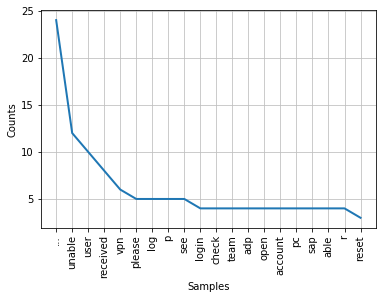

In [249]:
import matplotlib.pyplot as plt
DDfreq.plot(20,cumulative=False)
plt.show()

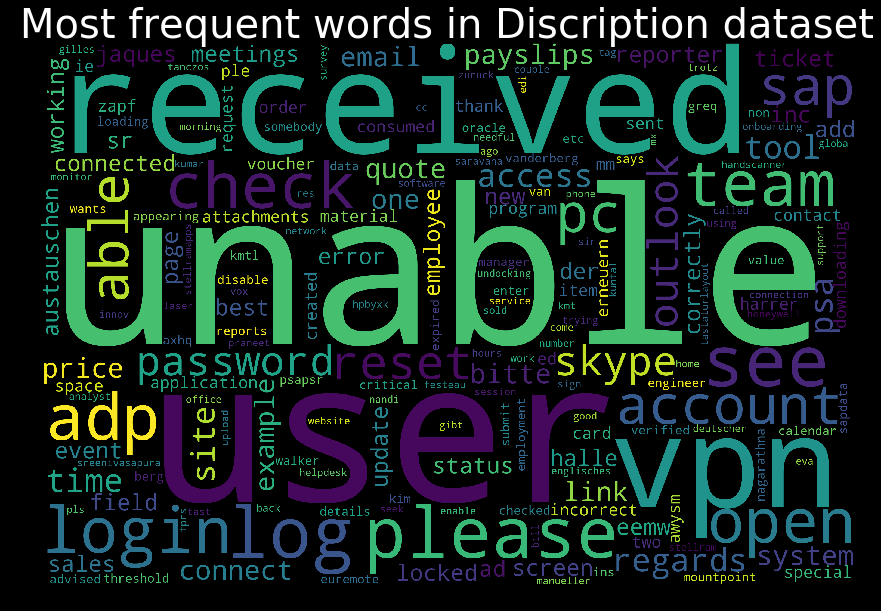

In [250]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_inc['Description']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Discription dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

### Remove any additional text after this text 'regards', 'thanks', 'thankyou','thank you','this communication is intended'

In [251]:
pattern = re.compile("regards|thanks|thankyou|thank you|this communication is intended|best regard")

In [252]:
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: searchRE(pattern,'',x))
df_val['Description'] = df_val['Description'].apply(lambda x: searchRE(pattern,'',x))

In [253]:

import re
text1 = "THIS COMMUNICATION IS INTENDED FOR THE SOLE USE OF THE PERSON TO WHOM IT IS ADDRESSED AND MAY CONTAIN INFORMATION THAT IS PRIVILEGED, CONFIDENTIAL AND EXEMPT FROM DISCLOSURE UNDER APPLICABLE LAW. ANY DISSEMINATION, DISTRIBUTION OR DUPLICATION OF THIS COMMUNICATION BY SOMEONE OTHER THAN THE INTENDED RECIPIENT IS STRICTLY PROHIBITED. IF YOUR RECEIPT OF THIS COMMUNICATION IS IN ERROR, PLEASE NOTIFY THE SENDER AND DELETE THIS COMMUNICATION"
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: searchRE(text1,'',x))
df_val['Description'] = df_val['Description'].apply(lambda x: searchRE(text1,'',x))


In [254]:
text2 = "Select the following link to view the Disclaimer in an alternate language."

In [255]:
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: searchRE(text2,'',x))
df_val['Description'] = df_val['Description'].apply(lambda x: searchRE(text2,'',x))

In [257]:
sn_inc['Description'].head(10)

0    verified user details employee manager checked user ad reset password advised user login check c...
1    received kim walker team meetings skype meetings etc appearing outlook calendar somebody please ...
2    received jaques vanderberg cannot log vpn s jaques van der berg field sales engineer qld earthwo...
3                                                                                 unable access adp page
4                                                                                    unable log euremote
5                                                                                            skype error
6                                                                         unable log tool reporter skype
7     event critical axhq kmtl value mountpoint threshold oracle p sapdata sr psa sr psa data psapsr psa
8                                                     greq employment status new non employee enter user
9                                                      

In [258]:
sn_inc.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count', 'Type', 'Severity',
       'Description_new', 'Description_new1'],
      dtype='object')

In [259]:
#Creating a sets whith all distinct words for description
from nltk.tokenize import word_tokenize
tokenized_word_DD=word_tokenize(str(sn_inc["Description"]))

In [261]:
#Description
from nltk.probability import FreqDist
fdist_DD = FreqDist(tokenized_word_DD)
print(fdist_DD)

<FreqDist with 466 samples and 659 outcomes>


In [262]:
fdist_DD.most_common()

[('...', 24),
 ('unable', 12),
 ('user', 10),
 ('received', 8),
 ('vpn', 6),
 ('please', 5),
 ('log', 5),
 ('p', 5),
 ('see', 5),
 ('login', 4),
 ('check', 4),
 ('team', 4),
 ('adp', 4),
 ('open', 4),
 ('account', 4),
 ('pc', 4),
 ('sap', 4),
 ('able', 4),
 ('r', 4),
 ('reset', 3),
 ('password', 3),
 ('skype', 3),
 ('outlook', 3),
 ('s', 3),
 ('access', 3),
 ('psa', 3),
 ('site', 3),
 ('time', 3),
 ('payslips', 3),
 ('link', 3),
 ('connect', 3),
 ('system', 3),
 ('price', 3),
 ('quote', 3),
 ('one', 3),
 ('email', 3),
 ('q', 3),
 ('bitte', 3),
 (':', 3),
 ('employee', 2),
 ('ad', 2),
 ('meetings', 2),
 ('jaques', 2),
 ('der', 2),
 ('field', 2),
 ('sales', 2),
 ('page', 2),
 ('error', 2),
 ('tool', 2),
 ('reporter', 2),
 ('event', 2),
 ('sr', 2),
 ('status', 2),
 ('new', 2),
 ('add', 2),
 ('ticket', 2),
 ('update', 2),
 ('inc', 2),
 ('connected', 2),
 ('correctly', 2),
 ('screen', 2),
 ('locked', 2),
 ('working', 2),
 ('austauschen', 2),
 ('eemw', 2),
 ('halle', 2),
 ('b', 2),
 ('applic

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

### Feature Engineering

Join Short Description and Detailed Description to create a new column called SD - DD

In [263]:
# Join Short Description and Detailed Description to create a new column called SD - DD
sn_inc["SD - DD"] = sn_inc['Short description'].str.cat(sn_inc["Description"], sep= ' - ')
df_val["SD - DD"] = df_val['Short description'].str.cat(df_val["Description"], sep= ' - ')

In [264]:
# Identify null values from Description
nan_rows = sn_inc[sn_inc['SD - DD'].isnull()]
print("Data Set Length with Null Values in SD - DD Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD'].isnull()]
print("Test Data Set Length with Null Values in SD - DD Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD Column - 0
Test Data Set Length with Null Values in SD - DD Column - 0


Join Short Description and Detailed Description with Caller to create a new column called SD - DD - Caller

In [265]:
sn_inc.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count', 'Type', 'Severity',
       'Description_new', 'Description_new1', 'SD - DD'],
      dtype='object')

In [266]:
# Join Short Description and Detailed Description with Caller to create a new column called SD - DD - Caller
sn_inc["SD - DD - Caller"] = sn_inc['SD - DD'].str.cat(sn_inc["Caller"], sep= ' - ')
df_val["SD - DD - Caller"] = df_val['SD - DD'].str.cat(df_val["Caller"], sep= ' - ')

In [267]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['SD - DD - Caller'].isnull()]
print("Data Set Length with Null Values in SD - DD - Caller Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD - Caller'].isnull()]
print("Test Data Set Length with Null Values in SD - DD - Caller Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD - Caller Column - 2
Test Data Set Length with Null Values in SD - DD - Caller Column - 1


In [268]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["SD - DD - Caller"].fillna("The", inplace=True)
df_val["SD - DD - Caller"].fillna("The", inplace=True)

In [269]:
# Join Short Description and Detailed Description with Department to create a new column called SD - DD - Dept
sn_inc["SD - DD - Dept"] = sn_inc['SD - DD'].str.cat(sn_inc["Department"], sep= ' - ')
df_val["SD - DD - Dept"] = df_val['SD - DD'].str.cat(df_val["Department"], sep= ' - ')

In [270]:
# Identify null values from Short Department
nan_rows = sn_inc[sn_inc['SD - DD - Dept'].isnull()]
print("Data Set Length with Null Values in SD - DD - Dept Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD - Dept'].isnull()]
print("Test Data Set Length with Null Values in SD - DD - Dept Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD - Dept Column - 6414
Test Data Set Length with Null Values in SD - DD - Dept Column - 1726


In [271]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["SD - DD - Dept"].fillna("The", inplace=True)
df_val["SD - DD - Dept"].fillna("The", inplace=True)

In [272]:
# Join Short Description and Detailed Description and Caller with Department to create a new column called SD - DD - Caller - Dept
sn_inc["SD - DD - Caller - Dept"] = sn_inc['SD - DD - Caller'].str.cat(sn_inc["Department"], sep= ' - ')
df_val["SD - DD - Caller - Dept"] = df_val['SD - DD - Caller'].str.cat(df_val["Department"], sep= ' - ')

In [273]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['SD - DD - Caller - Dept'].isnull()]
print("Data Set Length with Null Values in SD - DD - Caller - Dept Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD - Caller - Dept'].isnull()]
print("Test Data Set Length with Null Values in SD - DD - Caller - Dept Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD - Caller - Dept Column - 6414
Test Data Set Length with Null Values in SD - DD - Caller - Dept Column - 1726


In [274]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["SD - DD - Caller - Dept"].fillna("The", inplace=True)
df_val["SD - DD - Caller - Dept"].fillna("The", inplace=True)

In [275]:
print("Data Set Shape - ",sn_inc.shape)
print("Validation Data Set Shape - ",df_val.shape)

Data Set Shape -  (100159, 20)
Validation Data Set Shape -  (25661, 18)


In [276]:
# Drop few columns - Department, Assigned to columns (as many of the values are missing Department column)
sn_inc = sn_inc.drop({"Assigned to","Priority","Caller","Number","Resolved","Created","Reassignment count","Severity","Type"}, axis=1)
df_val = df_val.drop({"Assigned to","Priority","Caller","Number","Resolved","Created","Severity"}, axis=1)

In [277]:
sn_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100159 entries, 0 to 16885
Data columns (total 11 columns):
Caller [Incident]          100157 non-null object
Assignment group           100132 non-null object
Department                 93745 non-null object
Short description          100159 non-null object
Description                100159 non-null object
Description_new            100159 non-null object
Description_new1           100159 non-null object
SD - DD                    100159 non-null object
SD - DD - Caller           100159 non-null object
SD - DD - Dept             100159 non-null object
SD - DD - Caller - Dept    100159 non-null object
dtypes: object(11)
memory usage: 9.2+ MB


In [278]:
# Check for null values
sn_inc.isnull().sum()

Caller [Incident]             2
Assignment group             27
Department                 6414
Short description             0
Description                   0
Description_new               0
Description_new1              0
SD - DD                       0
SD - DD - Caller              0
SD - DD - Dept                0
SD - DD - Caller - Dept       0
dtype: int64

In [279]:
# Drop the rows that have null values in Assignment Groups
sn_inc = sn_inc.dropna(subset=["Assignment group"])
df_val = df_val.dropna(subset=["Assignment group"])

In [ ]:
# Drop the rows that have null values in Assignment Groups
sn_inc = sn_inc.dropna(subset=["Assignment group new"])
df_val = df_val.dropna(subset=["Assignment group new"])

In [ ]:
var = pd.pivot_table(sn_inc,index=["Assignment group new"],values=["Caller [Incident]"],aggfunc="count").head(60)
var.plot(kind='bar',figsize = (15,8))

In [281]:
print("There are {} callers in this dataset such as {}... \n".format(len(sn_inc["Caller [Incident]"].unique()),", ".join(sn_inc["Caller [Incident]"].unique()[0:5])))

There are 8438 callers in this dataset such as Brian Conrad, Kim Walker, Jaques Van Der Berg, John Johnson, Ian Bonnar... 



## Varying X and Models, y = Assignment Group

In [282]:
sn_inc.columns

Index(['Caller [Incident]', 'Assignment group', 'Department',
       'Short description', 'Description', 'Description_new',
       'Description_new1', 'SD - DD', 'SD - DD - Caller', 'SD - DD - Dept',
       'SD - DD - Caller - Dept'],
      dtype='object')

In [283]:
sn_inc = sn_inc.drop({"Description_new","Description_new1"}, axis=1)

In [284]:
sn_inc.columns

Index(['Caller [Incident]', 'Assignment group', 'Department',
       'Short description', 'Description', 'SD - DD', 'SD - DD - Caller',
       'SD - DD - Dept', 'SD - DD - Caller - Dept'],
      dtype='object')

In [285]:
# Create a copy of the data frame to carry out label encoding
sn_df1 = sn_inc.copy()
# Label encoding for Assignment Group
le = LabelEncoder()
le.fit(sn_df1['Assignment group'])
sn_df1['Assignment Group ID'] = le.transform(sn_df1['Assignment group'])
# Create a dictionary
labedict = {}

# Create a new dataframe to store the original Assignment Group Names and Label encoded Assignment Group IDs
dfnew = pd.DataFrame()
dfnew['Assignment group'] = sn_df1['Assignment group']
dfnew['Assignment group IDs'] = sn_df1['Assignment Group ID']
labedict['Assignment group'] = dfnew
print(dfnew.shape)

# Remove the duplicate values from this new data frame and assign it to a new dataframe
# This will consists of unique set of Assignment groups mapped to the label encoded IDs
agdf = dfnew[['Assignment group','Assignment group IDs']].drop_duplicates()
print("Unique Asignment Groups -", agdf.shape)
agdf.head()

(100132, 2)
Unique Asignment Groups - (114, 2)


,Assignment group,Assignment group IDs
0,GSO - Service Desk,42
7,DB Admin,24
17,Security Admin,90
19,Americas - PC Services,4
34,Network Operations,61


In [286]:
# Testing on the validation set
agdf1 = dict(zip(agdf['Assignment group'],agdf['Assignment group IDs']))
df_val1 = df_val.copy()

# Additional filter for Incidents
df_val1 = df_val1[df_val1["Type"] == "INC"]
print("Only Incidents - ",df_val1.shape)

df_val1['Assignment group IDs'] = df_val1['Assignment group'].map(agdf1)
print("Validation data set shape - ", df_val1.shape)
# Identify null values from Description
nan_rows = df_val1[df_val1['Assignment group IDs'].isnull()]
print("Data Set Length with Null Values in Assignment group IDs Column -",len(nan_rows))
# Drop the rows that have null values in Assignment Groups
df_val1 = df_val1.dropna(subset=["Assignment group IDs"])
print("Validation data set shape - Post mapping - After dropping null values from Assignment Group IDs", df_val1.shape)

Only Incidents -  (16721, 11)
Validation data set shape -  (16721, 12)
Data Set Length with Null Values in Assignment group IDs Column - 3
Validation data set shape - Post mapping - After dropping null values from Assignment Group IDs (16718, 12)


In [287]:
sn_df1.head()

,Caller [Incident],Assignment group,Department,Short description,Description,SD - DD,SD - DD - Caller,SD - DD - Dept,SD - DD - Caller - Dept,Assignment Group ID
0,Brian Conrad,GSO - Service Desk,IFBG,login issue,verified user details employee manager checked user ad reset password advised user login check c...,login issue - verified user details employee manager checked user ad reset password advised user...,login issue - verified user details employee manager checked user ad reset password advised user...,login issue - verified user details employee manager checked user ad reset password advised user...,login issue - verified user details employee manager checked user ad reset password advised user...,42
1,Kim Walker,GSO - Service Desk,INBG,outlook,received kim walker team meetings skype meetings etc appearing outlook calendar somebody please ...,outlook - received kim walker team meetings skype meetings etc appearing outlook calendar somebo...,outlook - received kim walker team meetings skype meetings etc appearing outlook calendar somebo...,outlook - received kim walker team meetings skype meetings etc appearing outlook calendar somebo...,outlook - received kim walker team meetings skype meetings etc appearing outlook calendar somebo...,42
2,Jaques Van Der Berg,GSO - Service Desk,IFBG,cant log vpn,received jaques vanderberg cannot log vpn s jaques van der berg field sales engineer qld earthwo...,cant log vpn - received jaques vanderberg cannot log vpn s jaques van der berg field sales engin...,cant log vpn - received jaques vanderberg cannot log vpn s jaques van der berg field sales engin...,cant log vpn - received jaques vanderberg cannot log vpn s jaques van der berg field sales engin...,cant log vpn - received jaques vanderberg cannot log vpn s jaques van der berg field sales engin...,42
3,John Johnson,GSO - Service Desk,INBG,unable access adp page,unable access adp page,unable access adp page - unable access adp page,unable access adp page - unable access adp page - John Johnson,unable access adp page - unable access adp page - INBG,unable access adp page - unable access adp page - John Johnson - INBG,42
4,Ian Bonnar,GSO - Service Desk,NaN,unable log euremote,unable log euremote,unable log euremote - unable log euremote,unable log euremote - unable log euremote - Ian Bonnar,The,The,42


In [288]:
sn_df1["SD - DD"].head(1)

0    login issue - verified user details employee manager checked user ad reset password advised user...
Name: SD - DD, dtype: object

In [ ]:
### By doing EDA analysis....
from sklearn.linear_model import LogisticRegression
X = sn_df1["SD - DD"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=11)
logreg = Pipeline([('vect', CountVectorizer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)
y_pred_class_test = logreg.predict(X_test)

print("Train Accuracy - ",logreg.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = logreg.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [ ]:
### By doing EDA analysis....
X = sn_df1["SD - DD"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [ ]:
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### Multinomial Naive Bayes
X = sn_df1["SD - DD"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2),strip_accents = 'ascii',max_features = 500000)),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### Logistic Regression
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2),strip_accents = 'ascii',max_features = 500000)),
               ('clf', LogisticRegression(n_jobs=1, C=1e5)),
              ])
nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [ ]:
### TFIDF Vectorizer, No EDA analysis...
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [289]:
### SGD Classifier with Count Vect, No EDA analysis...
from sklearn.linear_model import SGDClassifier
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
sgd = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2),strip_accents = 'ascii',max_features = 500000)),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=500000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
      ...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [290]:
y_pred_class_test = sgd.predict(X_test)

print("Train Accuracy - ",sgd.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = sgd.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Train Accuracy -  85.80722479027564
Test Accuracy -  74.61051930758988
Validation Data Set Accuracy (Unseen data by the model -  74.25529369541812
cohen_score 0.6434856110689466


In [ ]:
### Gensim without EDA analysis
import gensim
from gensim.models import Word2Vec
from gensim import corpora

In [ ]:
### Word2Vec Model using Google news pre-trained model - No EDA carried out for dataset
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [ ]:
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [ ]:
train, test = train_test_split(sn_df1, test_size=0.3, random_state = 42)

In [ ]:
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['SD - DD - Caller']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['SD - DD - Caller']), axis=1).values

In [ ]:
from sklearn.manifold import TSNE
model = Word2Vec(train_tokenized,min_count=1)
#words = list(model.wv.vocab)
words = model.wv.index2word

#words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [ ]:
### SGD Classifier with Count Vect, No EDA analysis...
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train_word_average, train["Assignment Group ID"])

In [ ]:
y_pred_train = sgd.predict(X_train_word_average)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred_train, train["Assignment Group ID"]))

In [ ]:
y_pred = sgd.predict(X_test_word_average)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, test["Assignment Group ID"]))

In [ ]:
y_pred_class_test = sgd.predict(X_test_word_average)

print("Train Accuracy - ",sgd.score(X_train_word_average, train["Assignment Group ID"])*100)
print("Test Accuracy - ",metrics.accuracy_score(y_pred_class_test,test["Assignment Group ID"])*100)

# Validation data that is unseen by the model earlier
#X_val = df_val1["SD - DD - Caller"]
#y_val = df_val1["Assignment group IDs"]
#val_tokenized = test.apply(lambda r: w2v_tokenize_text(r['SD - DD - Caller']), axis=1).values
#X_val_word_average = word_averaging_list(wv,val_tokenized)
#X_val_dtm = vect.transform(X_val)
#y_pred_class_val = sgd.predict(X_val_word_average) 
#print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_pred_class_val,y_val)*100)
cohen_score = cohen_kappa_score(test["Assignment Group ID"], y_pred_class_test)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [ ]:
### Neural Network on the dataset without carrying out any EDA....

In [ ]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [ ]:
train_size = int(len(sn_df1) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(sn_df1) - train_size))

In [ ]:
train_x = sn_df1["SD - DD - Caller"][:train_size]
train_y = sn_df1["Assignment Group ID"][:train_size]

test_x = sn_df1["SD - DD - Caller"][train_size:]
test_y = sn_df1["Assignment Group ID"][train_size:]

In [ ]:
from keras.preprocessing import text, sequence
max_words = 10000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [ ]:
tokenize.fit_on_texts(train_x) # only fit on train
X_train = tokenize.texts_to_matrix(train_x)
X_test = tokenize.texts_to_matrix(test_x)

In [ ]:
y_train = train_y
y_test = test_y

In [ ]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

In [ ]:
print(history.history.keys())

In [ ]:
# Get training and test loss histories and also accuracies
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['acc']
test_acc = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Visualize loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Visualize accuracy history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title('Visualize accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
accuracy = model.evaluate(x=X_train,y=y_train,verbose=0)
print("Train Model Accuracy: ", accuracy[1])

In [ ]:
accuracy = model.evaluate(x=X_test,y=y_test,verbose=0)
print("Test Model Accuracy: ", accuracy[1])

### Overfit Model

In [ ]:
model.summary()

In [ ]:
# Build the model - with additional layers...
model = Sequential()
model.add(Dense(units = 1000, activation ='relu', input_shape=(max_words,)))
model.add(Dense(units = 750, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 500, activation ='relu'))
model.add(Dense(units = 250, activation ='relu'))
model.add(Dense(units = num_classes, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

In [ ]:
accuracy = model.evaluate(x=X_train,y=y_train,verbose=0)
print("Train Model Accuracy: ", accuracy[1])

In [ ]:
accuracy = model.evaluate(x=X_test,y=y_test,verbose=0)
print("Test Model Accuracy: ", accuracy[1])

## Gradient Boosting Classifier

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(gbc_token(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
# define a function that accepts a vectorizer and calculates the accuracy
def gbc_token(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    GBC=OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train_dtm,y_train)
    
    y_pred_class_test = GBC.predict(X_test_dtm)
    print("Train Accuracy - ",GBC.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = GBC.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, GBC.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))



## SVM Technique

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(svm_token1(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
# define a function that accepts a vectorizer and calculates the accuracy
def svm_token1(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    SVM=OneVsRestClassifier(SVC()).fit(X_train_dtm,y_train)
    
    y_pred_class_test = SVM.predict(X_test_dtm)
    print("Train Accuracy - ",SVM.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = SVM.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, SVM.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))



In [ ]:
# define a function that accepts a vectorizer and calculates the accuracy
def svm_token(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    SVM = svm.SVC(C=1.0, kernel='linear', degree=2, gamma='auto')
    clf = OneVsRestClassifier(base_clf).fit(X_vectorized, y_train)
    SVM.fit(X_train_dtm, y_train)
    
    y_pred_class_test = SVM.predict(X_test_dtm)
    print("Train Accuracy - ",SVM.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = SVM.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, SVM.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

## Count Vectorizer and TFIDF

In [ ]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect, X_train, X_test, y_train, y_test, feature_name):
    df_cr = pd.DataFrame()
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()    
    nb.fit(X_train_dtm, y_train)    
    y_pred_class_test = nb.predict(X_test_dtm)
    print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    df_cr = classification_report(y_val, y_pred_class_val) 
    print(df_cr)
    print(type(df_cr))
    cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
    print("cohen_score",cohen_score)
    df_cr.to_csv("Classification Report.csv")
    
    
    return [feature_name, nb.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

### TFIDF

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = TfidfVectorizer()
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

### Count Vectorizer

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer()
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2))
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller", "SD - DD - Dept", "SD - DD - Caller - Dept"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
X1 = ["SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
sn_df1.head()

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 3), strip_accents = 'ascii', max_features = 900000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
# from the above data , create a new dataframe with all Training & Test accuracy scores along with Train & Test Errors
con_df = pd.DataFrame(Stat_NLP)
con_df.rename(columns={0: 'Feature', 1: 'Training Model Accuracy Score', 2: 'Testing Model Accuracy Score', 3: 'Validation Model Accuracy Score (unseen)'}, inplace=True)
con_df.head()

## Stemming using Porter Stemmer

In [ ]:
#porter_stemmer=PorterStemmer()
porter_stemmer=SnowballStemmer("english")
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i].apply(stem_sentences)
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test1(vect, X_train, X_test, y_train, y_test, i))

In [ ]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test1(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()    
    nb.fit(X_train_dtm, y_train)
    
    y_pred_class_test = nb.predict(X_test_dtm)
    print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name].apply(stem_sentences)
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, nb.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

In [ ]:
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
# define a function that accepts text and returns a list of lemmas
from textblob import TextBlob, Word
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [ ]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test2(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()    
    nb.fit(X_train_dtm, y_train)
    
    y_pred_class_test = nb.predict(X_test_dtm)
    print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name].apply(split_into_lemmas)
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, nb.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i].apply(split_into_lemmas)
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test2(vect, X_train, X_test, y_train, y_test, i))

## Neural Network

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(ngram_range=(1, 2))
    X_train_dtm = vect.fit_transform(X_train)
    #X_test_dtm = vect.fit_transform(X_test)
    #Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))
----------------------------------------
from keras.utils import to_categorical
y_binary = to_categorical(y_train)
------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=3841, activation='relu', input_dim=len(vect.get_feature_names())))
model.add(Dense(units=19, activation='sigmoid'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
-----------------------------------------------------
model.fit(X_train_dtm[:-100], y_binary[:-100], 
          epochs=2, batch_size=128, verbose=1, 
          validation_data=(X_train_dtm[-100:], y_binary[-100:]))

In [ ]:
Trg_acc = nb.score(X_train_dtm, y_train)
Test_acc = metrics.accuracy_score(y_test, y_pred_class)
Val_acc = metrics.accuracy_score(y_val, y_pred_class1)
#print(Trg_acc,Test_acc,Val_acc)
# Plotting the accuracy results
plt.figure(figsize = (6,4))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
x = ["Training Accuracy" , "Testing Accuracy", "Validation Accuracy"]
y = [Trg_acc*100,Test_acc*100,Val_acc*100]
ax.bar(x, y,width=0.5,color='g',align='center')
ax.set(ylabel="Accuracy %",title="Accuracy scores for X = SD-DD, y = Assignment Group, Model = Multinomial Naive Bayes")
#plt.title("Accuracy scores for X = SD-DD, y = Assignment Group, Model = Multinomial Naive Bayes ")
#plt.legend()
plt.show()

In [ ]:
#BOW with Keras

In [ ]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [ ]:

train_size = int(len(df6) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df6) - train_size))

In [ ]:
tokenize = text.Tokenizer( char_level=False)

In [ ]:
print(X_train.shape)

In [ ]:
tokenize.fit_on_texts(X_train) # only fit on train
x_train = tokenize.texts_to_matrix(X_train)
x_test = tokenize.texts_to_matrix(X_test)